<a href="https://colab.research.google.com/github/bflaggs/DSPS_BFlaggs/blob/main/HW8/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [3]:
ls .kaggle

kaggle.json


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [4]:
import pandas as pd
import json
import os
import pylab as pl
from pprint import pprint
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [5]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_curve

In [6]:
envs = json.load(open(".kaggle/kaggle.json", "r"))

In [7]:
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [8]:
!pip install kaggle

In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15765  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9535  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4309  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3494  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [ ]:
!kaggle competitions download -c higgs-boson

  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 41.1MB/s]
  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 443kB/s]
 95% 33.0M/34.8M [00:00<00:00, 91.1MB/s]
100% 34.8M/34.8M [00:00<00:00, 99.6MB/s]
 65% 11.0M/16.9M [00:00<00:00, 110MB/s]
100% 16.9M/16.9M [00:00<00:00, 107MB/s]


In [ ]:
!ls -ltr

total 55574
drwx------ 2 root root     4096 Nov 12 20:18 titanic
-rw------- 1 root root  2702527 Nov 16 21:20 random_submission.zip
-rw------- 1 root root 36483908 Nov 16 21:20 test.zip
-rw------- 1 root root     3223 Nov 16 21:20 HiggsBosonCompetition_AMSMetric_rev1.py
-rw------- 1 root root 17712751 Nov 16 21:20 training.zip


In [ ]:
!mkdir HiggsBoson

In [ ]:
!mv training.zip test.zip random_submission.zip HiggsBosonCompetition_AMSMetric_rev1.py ./HiggsBoson/.

In [9]:
cd HiggsBoson

/content/drive/My Drive/HiggsBoson


In [10]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv
random_submission.csv			 training.csv


In [ ]:
!unzip training.zip 

Archive:  training.zip
  inflating: training.csv            


In [ ]:
!unzip test.zip 

Archive:  test.zip
  inflating: test.csv                


In [ ]:
!unzip random_submission.zip 

Archive:  random_submission.zip
  inflating: random_submission.csv   


In [ ]:
!rm test.zip training.zip random_submission.zip

In [11]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.csv
random_submission.csv			 training.csv


In [22]:
higgsdataNoCuts = pd.read_csv("training.csv")

In [23]:
higgsdataNoCuts.Label.unique()

array(['s', 'b'], dtype=object)

In [24]:
higgsdataNoCuts.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [25]:
# Remove the "NaNs" from the data set (these are the -999.0 values)

higgsdataCut =  higgsdataNoCuts[(higgsdataNoCuts.DER_mass_MMC != -999.0) & 
                        (higgsdataNoCuts.DER_deltaeta_jet_jet != -999.0) & 
                        (higgsdataNoCuts.DER_mass_jet_jet != -999.0) & 
                        (higgsdataNoCuts.DER_prodeta_jet_jet != -999.0) & 
                        (higgsdataNoCuts.DER_lep_eta_centrality != -999.0) & 
                        (higgsdataNoCuts.PRI_jet_leading_pt != -999.0) & 
                        (higgsdataNoCuts.PRI_jet_leading_eta != -999.0) & 
                        (higgsdataNoCuts.PRI_jet_leading_phi != -999.0) &
                        (higgsdataNoCuts.PRI_jet_subleading_pt != -999.0) & 
                        (higgsdataNoCuts.PRI_jet_subleading_eta != -999.0) & 
                        (higgsdataNoCuts.PRI_jet_subleading_phi != -999.0)]

In [26]:
higgsdataCut.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,281.524727,1.480924,0.637307,0.463833,45.716667,-0.003367,0.001104,52.433431,-0.003671,0.041897,54.959294,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631,0.445788
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,130.245426,1.097985,0.924876,0.398422,29.681876,1.179442,1.818341,28.798872,1.197358,1.815463,42.690672,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736,0.747552
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,110.601000,0.047000,-1.414000,0.000000,20.000000,-2.496000,-3.141000,26.001000,-2.487000,-3.142000,0.200000,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000,0.001502
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,192.844250,0.762250,0.191000,0.005000,26.589250,-0.889000,-1.570000,33.280250,-0.908750,-1.518000,27.081000,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000,0.001503
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,246.719500,1.206000,1.071000,0.469000,36.590500,-0.011000,-0.010000,43.450000,-0.009000,0.077000,44.292000,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500,0.064061
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,331.105000,1.854000,1.342000,0.883000,54.194250,0.879750,1.580000,61.482000,0.904000,1.609000,69.416250,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250,0.744056
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,1852.462000,19.773000,1.414000,1.000000,622.862000,2.497000,3.142000,461.896000,2.499000,3.141000,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.805035


In [27]:
labels = np.array(higgsdataCut["Label"])
weights = np.array(higgsdataCut["Weight"])

In [28]:
labels

array(['s', 'b', 's', ..., 's', 's', 'b'], dtype=object)

In [29]:
weights

array([0.00265331, 0.08341403, 0.00265331, ..., 0.01863612, 0.0015027 ,
       0.06406078])

In [30]:
higgsdata = higgsdataCut.drop(columns=['Weight', 'Label'])

In [31]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [32]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,281.524727,1.480924,0.637307,0.463833,45.716667,-0.003367,0.001104,52.433431,-0.003671,0.041897,54.959294,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,130.245426,1.097985,0.924876,0.398422,29.681876,1.179442,1.818341,28.798872,1.197358,1.815463,42.690672,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,110.601000,0.047000,-1.414000,0.000000,20.000000,-2.496000,-3.141000,26.001000,-2.487000,-3.142000,0.200000,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,192.844250,0.762250,0.191000,0.005000,26.589250,-0.889000,-1.570000,33.280250,-0.908750,-1.518000,27.081000,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,246.719500,1.206000,1.071000,0.469000,36.590500,-0.011000,-0.010000,43.450000,-0.009000,0.077000,44.292000,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,331.105000,1.854000,1.342000,0.883000,54.194250,0.879750,1.580000,61.482000,0.904000,1.609000,69.416250,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,1852.462000,19.773000,1.414000,1.000000,622.862000,2.497000,3.142000,461.896000,2.499000,3.141000,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [33]:
X_train, X_test, y_train, y_test = train_test_split(higgsdata.values, labels, test_size=0.2)

In [34]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state=0, max_depth=8)
print('Parameters currently in use (RF):\n')
pprint(rf.get_params())

Parameters currently in use (RF):

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [35]:
gbt = GradientBoostingClassifier(random_state=69420, max_depth=8)
print('Parameters currently in use (GBT):\n')
pprint(gbt.get_params())

Parameters currently in use (GBT):

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 69420,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [36]:
rf.fit(X_train, y_train)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=8, random_state=69420)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [39]:
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8481217081719917, 0.8353519782720399)

In [40]:
gbt.score(X_train, y_train), gbt.score(X_test, y_test)

(0.9210328311097246, 0.8479042795272701)

# From the scores of the random forest classifier we can see that overtraining is not occurring because the score for the training set is about the same as the score of the testing set (within about 5%). For the gradient boosted tree we can say that overtraining is most likely occurring because the training score is higher than the testing score by about 7%. Although we argue that overtraining is not occurring unless the training score was higher than the testing score by at least 10%. If the score of the training data sets was much higher than the score of the testing data sets (more than 10% difference) we would say overfitting is occurring but for both the random forest and gradient boosted classifiers this is not the case.

- Produce a confusion matrix for each model and compare them


 



In [41]:
# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

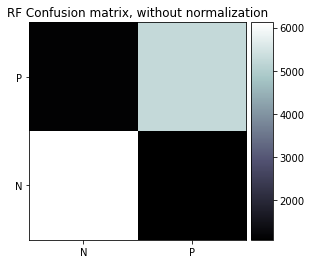

In [42]:
plot_confusion_matrix(y_test,rf.predict(X_test),title='RF')

#**Figure 1:** Confusion matrix for the random forest classifier. The false positive and false negative rates are equally small compared to the true positive and true negative rate - signaling the algorithm performs with high precision.

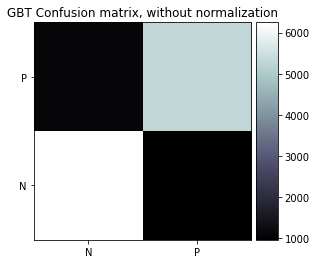

In [43]:
plot_confusion_matrix(y_test,gbt.predict(X_test),title='GBT')

#**Figure 2:** Confusion matrix for the gradient boosting classifier. The resulting confusion plot is indistinguishable from the plot generated by the random forest classifier. Both algorithms are therefore in agreement with one another.


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [44]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata.values, weights, test_size=0.2)

In [51]:
rfR = RandomForestRegressor(n_estimators=100, max_depth=8,
                                  random_state=0)
rfR.fit(traindata_weights, train_weights)
gbtR = GradientBoostingRegressor(n_estimators=100, max_depth=8,
                                  random_state=69420)
gbtR.fit(traindata_weights, train_weights)

GradientBoostingRegressor(max_depth=8, random_state=69420)

In [52]:
rfR.score(traindata_weights, train_weights), rfR.score(testdata_weights, test_weights)

(0.5030032583134632, 0.4352371995706059)

In [53]:
gbtR.score(traindata_weights, train_weights), gbtR.score(testdata_weights, test_weights)

(0.7252905119199686, 0.4665409196575362)

# The performance is quite poor for both the random forest regressor and the gradient boosted regressor. The random forest regressor has a score of about 50% for the training set and about 43% for the testing set which is not a good performance for the algorithm. The gradient boosted regressor has a score of about 72% for the training set and about 46% for the testing set which again are not good performance scores for the algorithm. The random forest regressor algorithm might be overfitting slightly because of the difference of 7% between the training and testing sets although it is not a large enough difference to cause concern as of right now (we would consider cause for concern to be a 10% difference between training and testing scores). The gradient boosted algorithm is definitely overfitting because of the difference of 26% between the training and testing sets.

In [54]:
rfR.predict(testdata_weights)

array([0.94432936, 0.7724599 , 0.42408235, ..., 0.03290912, 0.54452875,
       1.65573094])

In [55]:
gbtR.predict(testdata_weights)

array([1.04933906, 0.73943066, 0.06643517, ..., 0.06616213, 0.42164916,
       0.88125708])

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [56]:
def L1(y_true, y_pred):
    L1 = np.sum(np.abs(y_true - y_pred))
    return L1

def L2(y_true, y_pred):
    L2 = np.sum((y_true - y_pred)**2)
    return L2

In [57]:
L1(test_weights, rfR.predict(testdata_weights)), L2(test_weights, rfR.predict(testdata_weights))

(4710.484292862098, 4128.178607788998)

In [58]:
L1(test_weights, gbtR.predict(testdata_weights)), L2(test_weights, gbtR.predict(testdata_weights))

(4481.421570377497, 3899.361576092103)

#L1 and L2 are loss functions, that compare the predicted versus the true test weights. A lower value of L1 and L2 indicates an improvement in quality in splits from all the trees in a forest. Therefore, using the Gradient Boosting Classifier is a better way to combine decision trees.

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



In [59]:
rf.feature_importances_

array([0.00115469, 0.34118019, 0.04757621, 0.11412692, 0.01533334,
       0.04937445, 0.0698415 , 0.08192753, 0.03668614, 0.02482502,
       0.0058875 , 0.01291133, 0.03784941, 0.06323465, 0.02617127,
       0.00277327, 0.00115364, 0.00415307, 0.00396547, 0.00098589,
       0.01695649, 0.00113609, 0.00518142, 0.01586441, 0.00324073,
       0.00289783, 0.00108419, 0.00360845, 0.00359226, 0.00115381,
       0.00417279])

In [60]:
#find most important features
rf.feature_importances_
features=[np.argsort(rf.feature_importances_)[-1],
  np.argsort(rf.feature_importances_)[-2],
  np.argsort(rf.feature_importances_)[-3],
  np.argsort(rf.feature_importances_)[-4]]
print("Important feautures: "+higgsdata.columns[features[0]]+', '
      +higgsdata.columns[features[1]]+', '
      +higgsdata.columns[features[2]]+', '
      +higgsdata.columns[features[3]])

Important feautures: DER_mass_MMC, DER_mass_vis, DER_prodeta_jet_jet, DER_mass_jet_jet


#The four most important features are the the following: the estimated mass of the Higgs boson candidate, the invariant mass of the hadronic tau and the electron, the transverse mass between the missing transverse energy and the lepton, and the transverse momentum of the hadronic tau. **UPDATE THIS**.

#Therefore the most important features to help distinguish between bosons decaying into two taus are mass, energy, or momentum values of the primary particle or its decay particles. **UPDATE THIS**.

#It is important to note that all four of these values were quantities derived from the raw data because the quantities are labeled with `DER`. 

In [61]:
random_grid = {'n_estimators': [10, 100],
               'max_depth': [3, 10, None],
               'bootstrap': [True, False],
               'max_features': ['auto', 'sqrt']
               } 

In [62]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [63]:
higgsdataBestFourFeatures = higgsdata.iloc[:, features]

In [64]:
higgsdataBestFourFeatures

,DER_mass_MMC,DER_mass_vis,DER_prodeta_jet_jet,DER_mass_jet_jet
0,138.470,97.827,2.666,124.711
5,89.744,59.149,-0.540,284.584
6,148.754,107.782,0.113,158.359
11,114.744,75.712,-1.401,252.599
23,141.481,111.581,-0.923,364.344
...,...,...,...,...
249976,137.371,92.603,-2.384,322.430
249980,119.934,88.751,1.836,111.491
249985,126.151,95.258,-0.240,163.066
249993,130.075,66.781,-0.207,322.296


In [65]:
traindata, testdata, train_labels, test_labels = train_test_split(higgsdataBestFourFeatures.values, labels, test_size=0.2)

In [66]:
rfBest = RandomForestClassifier(random_state=0)
print('Parameters currently in use (RF best):\n')
pprint(rfBest.get_params())

Parameters currently in use (RF best):

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [67]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 24 different combinations
random_search = RandomizedSearchCV(estimator = rfBest, param_distributions=random_grid,
                                   n_iter=1, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [68]:
random_search.fit(traindata, train_labels)
                  

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

In [69]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(random_search.best_score_))


Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': False}
Best score is 0.7857078014598519


In [70]:
df = pd.DataFrame(random_search.cv_results_)


In [71]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.116187,0.011141,0.170694,0.004722,100,sqrt,3,False,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.784409,0.783198,0.789517,0.785708,0.002739,1


# Extra Credit: Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [72]:
rfBest.fit(traindata, train_labels.flatten()=="s")

RandomForestClassifier(random_state=0)

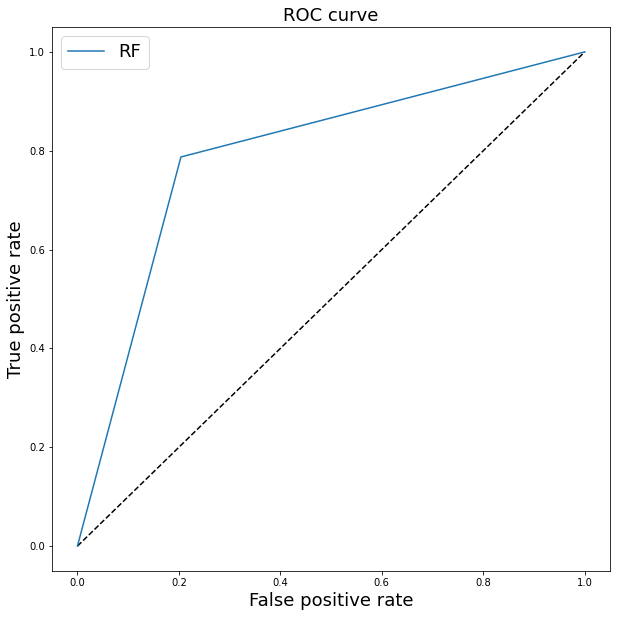

In [73]:
# The random forest model by itself
y_pred_grd_rfcat = rfBest.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_labels.flatten()=="s", rfBest.predict(testdata))

plt.figure(1, figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate', fontsize=18)
plt.ylabel('True positive rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()


#**Figure 3:** Probability of a true positive versus a false positive. A completely random classifier should give points lying along the diagonal, where the true positive rate equals the false positive rate. The fact that the curve bows toward the ideal point of (0,1) indicates that the random forest classifier has predictive power.